* File copied from http://www.ssa.gov/oact/babynames/limits.html

In [1]:
%matplotlib inline


In [2]:
import pandas as pd
import numpy as np
# from IPython.display import display, HTML

In [3]:
names1880 = pd.read_csv('names/yob1880.txt', names=['name','sex','births'])

In [4]:
names1880[:5]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [5]:
names1880.groupby('sex').sum()

,births
sex,
F,90992
M,110490


** use "pandas.concat" to combine multiple data files **

In [6]:
years = range(1880, 2011)

In [7]:
pieces = []
columns = ['name','sex','births']

In [8]:
for year in years:
    path = 'names/yob%s.txt'% year
    #print path
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

In [9]:
# pandas.concat operates on list of dataframe, ignore_index=True means the order of rows won't be preserved
names = pd.concat(pieces, ignore_index=True)

In [10]:
names[:10]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


** When group data with 2 features, pivot_table use 1 feature as the index(for each row), the other feature as the columns **

In [11]:
total_birth = names.pivot_table('births', index='year',columns='sex',aggfunc=sum)

In [12]:
total_birth[:5]

sex,F,M
year,,
1880,90992,110490
1881,91953,100743
1882,107848,113686
1883,112318,104627
1884,129020,114443


In [13]:
total_birth.tail()

sex,F,M
year,,
2006,1898776,2052652
2007,1919775,2072505
2008,1887660,2036750
2009,1833461,1979895
2010,1773440,1914629


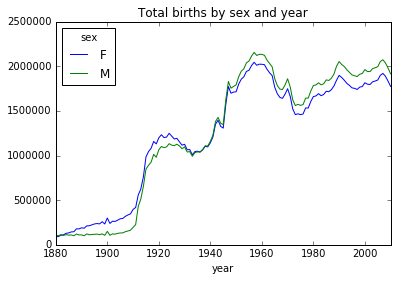

In [14]:
total_birth.plot(title='Total births by sex and year')

In [15]:
# add proportion of count of each name in the total baby count
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births/births.sum()
    return group
names = names.groupby(['year','sex']).apply(add_prop)

** The prop is based on each group. When the "add_prop" is applied, it's applying on each group's rows. **

In [16]:
names[:5]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189


In [17]:
len(names)

1691755

In [18]:
# Sanity check to see if the sum of prop is close to 1
np.allclose(names.groupby(['year','sex']).prop.sum(), 1)

True

** top 1000 names for each year/sex group **

In [19]:
def get_top1000(group):
    return group.sort_values(by='births',ascending=False)[:1000]
    #return group.sort_values(by='births',ascending=False)[:900]

In [20]:
grouped = names.groupby(['year','sex'])
top1000 = grouped.apply(get_top1000)

In [21]:
len(top1000)

261877

In [22]:
top1000.loc[1880,'M']

,name,sex,births,year,prop
942,John,M,9655,1880,0.087383
943,William,M,9531,1880,0.086261
944,James,M,5927,1880,0.053643
945,Charles,M,5348,1880,0.048403
946,George,M,5126,1880,0.046393
947,Frank,M,3242,1880,0.029342
948,Joseph,M,2632,1880,0.023821
949,Thomas,M,2534,1880,0.022934
950,Henry,M,2444,1880,0.022120
951,Robert,M,2415,1880,0.021857


** Another way to do it is as below: **

In [23]:
#pieces = []
#for year, group in names.groupby(['year','sex']):
 #   pieces.append(group.sort_values(by='births',ascending=False)[:1000])
#top1000 = pd.concat(pieces, ignore_index=True)

In [24]:
#len(top1000)

In [25]:
#top1000[:5]

In [26]:
# Split the top1000 into female and male:
boys = top1000[top1000.sex=='M']
girls = top1000[top1000.sex=='F']

In [27]:
total_births = top1000.pivot_table('births',index='year',columns='name',aggfunc=sum)

In [28]:
total_births[:5]

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN


In [29]:
subset = total_births[['John','Harry','Mary','Marilyn']]

In [30]:
subset[:5]

name,John,Harry,Mary,Marilyn
year,,,,
1880,9701.0,2158.0,7092.0,NaN
1881,8795.0,2002.0,6948.0,NaN
1882,9597.0,2246.0,8178.0,NaN
1883,8934.0,2116.0,8044.0,NaN
1884,9428.0,2338.0,9253.0,NaN


**Each Series in a DataFrame can be plotted on a different axis with the subplots keyword**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x112f73f10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1136752d0>], dtype=object)

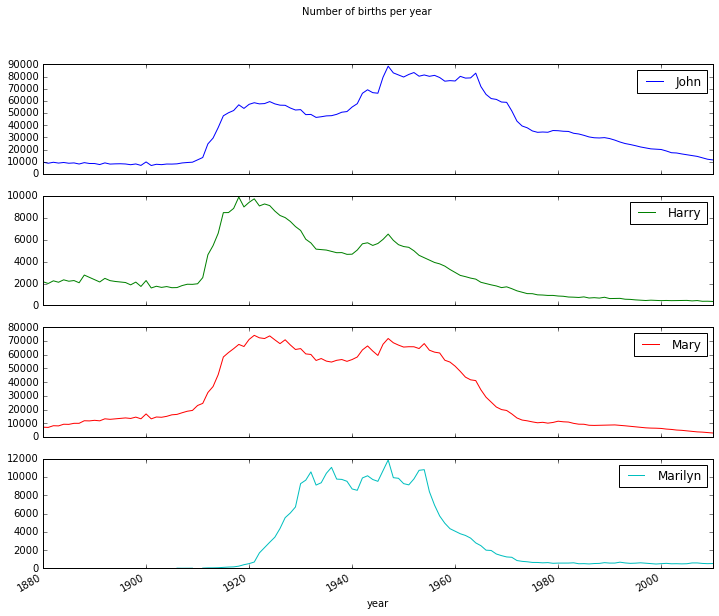

In [31]:
subset.plot(subplots=True,figsize=(12,10),grid=False,title="Number of births per year")

In [32]:
table = top1000.pivot_table('prop',index='year',columns='sex',aggfunc=sum)

In [33]:
table[:5]

sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539


**The reason why some of these are not 1 is because for some of the "top1000", there are more 1000 names, so when only include 1000 names, the the names are not 100% taken into account**

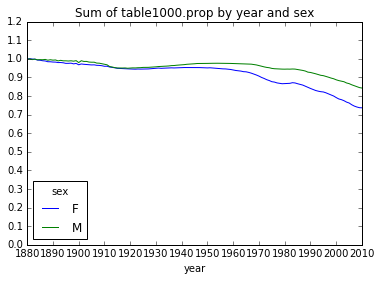

In [34]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0,1.2,13),xticks=range(1880,2020,10))

# Name diversity between in 1880 and 2010#

In [35]:
df_1880= boys[boys.year==1880]
df_2010 = boys[boys.year==2010]

In [36]:
df_1880.sort_values(by='prop',ascending=False).prop[:3]

year  sex     
1880  M    942    0.087383
           943    0.086261
           944    0.053643
Name: prop, dtype: float64

In [37]:
df_1880.sort_values(by='prop',ascending=False).prop[:3].cumsum()

year  sex     
1880  M    942    0.087383
           943    0.173645
           944    0.227288
Name: prop, dtype: float64

In [38]:
prop_cumsum_1880 = df_1880.sort_values(by='prop',ascending=False).prop.cumsum()
prop_cumsum_2010 = df_2010.sort_values(by='prop',ascending=False).prop.cumsum()

In [39]:
type(prop_cumsum_1880)

pandas.core.series.Series

In [40]:
prop_cumsum_1880.searchsorted(0.5)

array([13])

In [41]:
prop_cumsum_2010.searchsorted(0.5)

array([116])

**The above result shows that in 2010, the names are much more diversed compare to 1880**

In [42]:
def get_quantile_count(group,q=0.5):
    group = group.sort_values(by='prop',ascending=False)
    return group.prop.cumsum().searchsorted(0.5)+1

In [43]:
diversity = top1000.groupby(['year','sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [44]:
diversity[:10]

sex,F,M
year,,
1880,[38],[14]
1881,[38],[14]
1882,[38],[15]
1883,[39],[15]
1884,[39],[16]
1885,[40],[16]
1886,[41],[16]
1887,[41],[17]
1888,[42],[17]


In [45]:
diversity = diversity.astype(int)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11830f310>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1157c2110>], dtype=object)

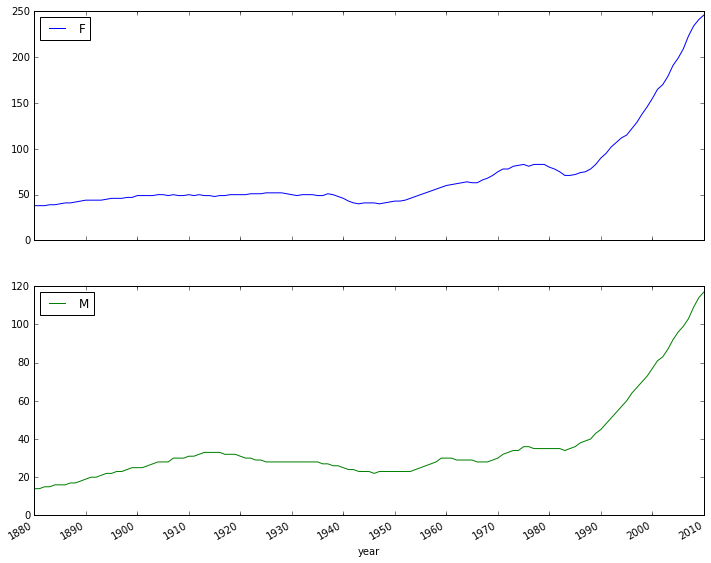

In [46]:
diversity.plot(subplots=True,figsize=(12,10),grid=False,xticks=range(1880,2020,10))

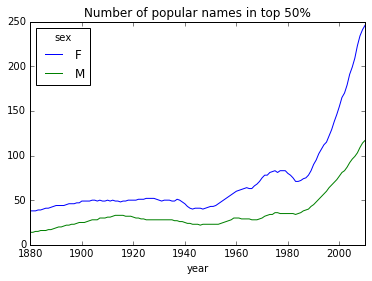

In [47]:
diversity.plot(title="Number of popular names in top 50%")

**The plot shows that girl names have always been more diversed than boy names**

# Boy name final letter change trend #

In [48]:
# First, aggregate all of the births in the full data set by year, sex, and final letter
get_last_letter = lambda x: x[-1:]
last_letters = names.name.map(get_last_letter)

In [49]:
last_letters[:5]

0    y
1    a
2    a
3    h
4    e
Name: name, dtype: object

In [50]:
last_letters.name

'name'

In [51]:
# change column name
last_letters.name = 'last_letter'

In [52]:
last_letters.name

'last_letter'

In [53]:
names[:2]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618


In [54]:
table = names.pivot_table('births',index=last_letters,columns=['sex','year'],aggfunc=sum)

In [55]:
table[:5]

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33380.0  34080.0  40399.0  41912.0  48089.0  49616.0  53884.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59441.0  58631.0    ...      39144.0   38834.0   
b                NaN      NaN      NaN    ...      50976.0   49304.0   
c                NaN      NaN      NaN    ...      27125.0   27253.0   
d             1027.0   1298.0   1374.0    ...      60880.0   55881.0   
e            54352.0  66749.0  66662.0    ...     145449.0  144716.0   

sex                                                                      \
year             2003      2004      2005      2006      2007      2008   
last_letter                                                               
a             37852.0   38681.0   36886.0   36218.0   34735.0   32995.0   
b             48090.0   45941.0   43189.0   42655.0   42206.0   40056.0   
c             27710.0   26795.0   26108.0   26664.0   26897.0   25374.0   
d             53427.0   51816.0   50741.0   51480.0   50703.0   48033.0   
e            144870.0  142206.0  141256.0  143142.0  143944.0  141267.0   

sex                              
year             2009      2010  
last_letter                      
a             31586.0   28837.0  
b             39055.0   39229.0  
c             24139.0   23325.0  
d             46322.0   44780.0  
e            135906.0  130130.0  

[5 rows x 262 columns]

In [56]:
type(table)

pandas.core.frame.DataFrame

In [57]:
subtable = table.reindex(columns=[1910,1960,2010],level='year')

In [58]:
subtable[:25]

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108398.0  691271.0  676151.0    977.0    5212.0   28837.0
b                 NaN     694.0     454.0    411.0    3912.0   39229.0
c                 5.0      49.0     954.0    482.0   15463.0   23325.0
d              6751.0    3728.0    2635.0  22113.0  262168.0   44780.0
e            133601.0  435056.0  316425.0  28665.0  178817.0  130130.0
f                 NaN      20.0      97.0    152.0    9230.0    2309.0
g                57.0     318.0     668.0    439.0   20232.0    2694.0
h             20432.0   73245.0  134668.0   8850.0   80852.0   99178.0
i               605.0   80816.0   56220.0    164.0    1293.0   43390.0
j                 NaN       NaN     164.0      NaN       NaN    1478.0
k                48.0     315.0     630.0   7104.0  105310.0   35491.0
l             17124.0   68488.0   46796.0  12628.0  223714.0  134873.0
m               476.0   17418.0    4607.0  11273.0   72149.0   47317.0
n             31417.0  264244.0  248422.0  27848.0  325322.0  693944.0
o               663.0    4934.0    2210.0   3314.0   27372.0   81540.0
p                 7.0      47.0      35.0    616.0   12104.0    2429.0
q                 NaN       NaN      53.0      NaN       NaN     344.0
r              5310.0   13681.0   32006.0  12522.0   66208.0  167354.0
s             15479.0   25817.0   23660.0  25404.0  219087.0  124756.0
t             10877.0   30738.0   13912.0  14156.0  140025.0   43776.0
u               271.0    1161.0     739.0     24.0     121.0    2354.0
v                 NaN     122.0     208.0     22.0      78.0    2777.0
w                 8.0      63.0    2109.0   1228.0   16444.0   30969.0
x                 6.0      74.0    1294.0    770.0    3948.0   16457.0
y             44002.0  308489.0  207081.0  15021.0  343303.0  111401.0

In [59]:
subtable.sum()

sex  year
F    1910     396503.0
     1960    2022121.0
     2010    1773440.0
M    1910     194216.0
     1960    2132756.0
     2010    1914629.0
dtype: float64

In [60]:
letter_prop = subtable/subtable.sum().astype(float)

In [61]:
letter_prop[:5]

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273385  0.341854  0.381265  0.005030  0.002444  0.015061
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020489
c            0.000013  0.000024  0.000538  0.002482  0.007250  0.012183
d            0.017026  0.001844  0.001486  0.113858  0.122925  0.023388
e            0.336948  0.215148  0.178424  0.147593  0.083843  0.067966

**The following doesn't work because there are multiple levels of columns, so for each column, subplots will generate a separate plot**

In [62]:
# letter_prop.plot(kind='bar',subplots=True,figsize=(12,10),grid=False)

**Instead, we can use matplotlib**

In [63]:
import matplotlib.pyplot as plt

# ????????????? understand subplots below#

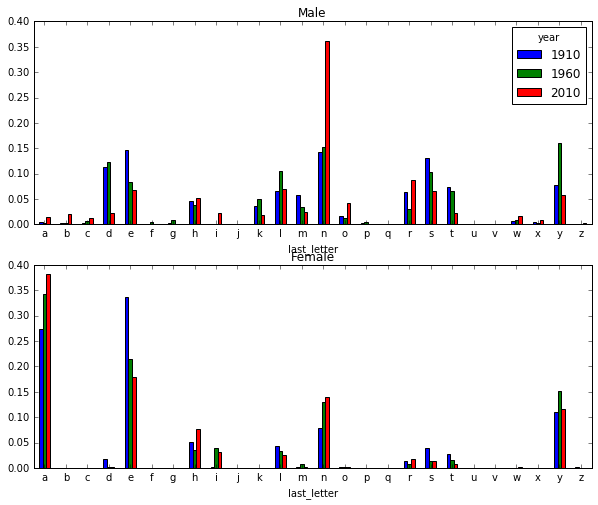

In [64]:
figs, axes = plt.subplots(2,1,figsize=(10,8))
letter_prop['M'].plot(kind='bar',rot=0,ax=axes[0],title='Male')
letter_prop['F'].plot(kind='bar',rot=0,ax=axes[1],title='Female',legend=False)

In [65]:
letter_prop = table/table.sum().astype(float)

In [66]:
dny_ts = letter_prop.ix[['d','n','y'],'M'].T

In [67]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153217,0.075763
1881,0.083242,0.153212,0.077455
1882,0.085332,0.149561,0.077538
1883,0.084051,0.151653,0.079148
1884,0.086121,0.149926,0.080407


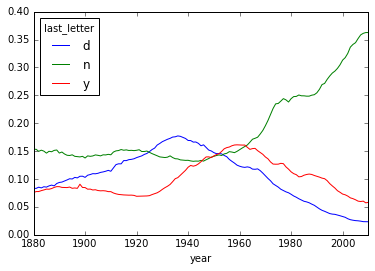

In [68]:
dny_ts.plot()

# Trend of boy names became girl names#

In [69]:
all_names = top1000.name.unique()

In [70]:
type(all_names)

numpy.ndarray

In [71]:
all_names

array(['Mary', 'Anna', 'Emma', ..., 'Rowen', 'Yousef', 'Joziah'], dtype=object)

In [72]:
mask = np.array(['lesl' in x.lower() for x in all_names])

In [73]:
%timeit mask

10000000 loops, best of 3: 29.7 ns per loop


In [74]:
%timeit lesly_like = all_names[mask]

The slowest run took 28.41 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.59 µs per loop


In [75]:
lesly_like

NameError: name 'lesly_like' is not defined

In [ ]:
filtered = top1000[top1000.name.isin(lesly_like)]

In [ ]:
filtered

In [ ]:
filtered.groupby('name').births.sum()

In [ ]:
table = filtered.pivot_table('births',index='year',columns='sex',aggfunc=sum)

In [ ]:
table

In [ ]:
table = table.div(table.sum(1),axis=0)

In [ ]:
table

In [ ]:
table.tail()

In [ ]:
table.plot(style={'M':'k-','F':'k--'})

In [ ]:
np?